# **1.Lets import data**

In [ ]:
import pandas as pd

# Load the datasets
calls_df = pd.read_csv("/content/drive/MyDrive/Dataset/callsf0d4f5a.csv")
customers_df = pd.read_csv("/content/drive/MyDrive/Dataset/customers2afd6ea.csv")
reason_df = pd.read_csv("/content/drive/MyDrive/Dataset/reason18315ff.csv")
sentiment_df = pd.read_csv("/content/drive/MyDrive/Dataset/sentiment_statisticscc1e57a.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Dataset/testbc7185d.csv")

# Display basic info and first few rows for each dataframe
calls_info = calls_df.info(), calls_df.head()
customers_info = customers_df.info(), customers_df.head()
reason_info = reason_df.info(), reason_df.head()
sentiment_info = sentiment_df.info(), sentiment_df.head()
test_info = test_df.info(), test_df.head()

calls_info, customers_info, reason_info, sentiment_info, test_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   call_id                  71810 non-null  int64 
 1   customer_id              71810 non-null  int64 
 2   agent_id                 71810 non-null  int64 
 3   call_start_datetime      71810 non-null  object
 4   agent_assigned_datetime  71810 non-null  object
 5   call_end_datetime        71810 non-null  object
 6   call_transcript          71810 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       71810 non-null  int64  
 1   customer_name     71810 non-null  object 
 2   elite_level_code  46043 non-null  float64
dtypes: float64(1), in

((None,
        call_id  customer_id  agent_id call_start_datetime  \
  0  4667960400   2033123310    963118     7/31/2024 23:56   
  1  1122072124   8186702651    519057       8/1/2024 0:03   
  2  6834291559   2416856629    158319     7/31/2024 23:59   
  3  2266439882   1154544516    488324       8/1/2024 0:05   
  4  1211603231   5214456437    721730       8/1/2024 0:04   
  
    agent_assigned_datetime call_end_datetime  \
  0           8/1/2024 0:03     8/1/2024 0:34   
  1           8/1/2024 0:06     8/1/2024 0:18   
  2           8/1/2024 0:07     8/1/2024 0:26   
  3           8/1/2024 0:10     8/1/2024 0:17   
  4           8/1/2024 0:14     8/1/2024 0:23   
  
                                       call_transcript  
  0  \n\nAgent: Thank you for calling United Airlin...  
  1  \n\nAgent: Thank you for calling United Airlin...  
  2  \n\nAgent: Thank you for calling United Airlin...  
  3  \n\nAgent: Thank you for calling United Airlin...  
  4  \n\nAgent: Thank you for calli

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Preprocessing

# **2. Now merge the all Data based on the basis of call_id**
# **Calculating AHT (Average Handle Time) and AST (Average Speed to Answer).**

In [ ]:
import pandas as pd

# Convert datetime columns to datetime type for processing
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['agent_assigned_datetime'] = pd.to_datetime(calls_df['agent_assigned_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

# Calculate AHT (Average Handle Time)
calls_df['handle_time'] = (calls_df['call_end_datetime'] - calls_df['agent_assigned_datetime']).dt.total_seconds()

# Calculate AST (Average Speed to Answer)
calls_df['speed_to_answer'] = (calls_df['agent_assigned_datetime'] - calls_df['call_start_datetime']).dt.total_seconds()

# Calculate AHT and AST overall
overall_aht = calls_df['handle_time'].mean()
overall_ast = calls_df['speed_to_answer'].mean()

# Merge the calls, reason, and sentiment dataframes on `call_id`
merged_df = calls_df.merge(reason_df, on='call_id', how='left')
merged_df = merged_df.merge(sentiment_df, on=['call_id', 'agent_id'], how='left')

# Instead of using the unavailable 'ace_tools', display the dataframe using pandas' head() method
# This will show the first 5 rows of the dataframe
merged_df.head()

# Alternatively, for a more interactive display in Jupyter Notebook, you can use:
# from IPython.display import display
# display(merged_df)

overall_aht, overall_ast

(697.0486004734717, 437.0675393399248)

**Results: Here are the calculated metrics:**

# Average Handle Time (AHT): 697.04 seconds
# Average Speed to Answer (AST): 437.06 seconds

# **3.Now proceeding to identify the key drivers of high AHT and AST, and quantify the percentage difference between the AHT for the most frequent and least frequent call reasons. ​**

In [ ]:
# Analyze frequency of primary call reasons
call_reason_counts = merged_df['primary_call_reason'].value_counts()

# Calculate AHT for each call reason
aht_by_reason = merged_df.groupby('primary_call_reason')['handle_time'].mean()

# Identify most and least frequent call reasons
most_frequent_reason = call_reason_counts.idxmax()
least_frequent_reason = call_reason_counts.idxmin()

# Calculate AHT for most and least frequent reasons
aht_most_frequent = aht_by_reason[most_frequent_reason]
aht_least_frequent = aht_by_reason[least_frequent_reason]

# Calculate percentage difference between AHT for most and least frequent call reasons
percentage_difference_aht = ((aht_most_frequent - aht_least_frequent) / aht_least_frequent) * 100

# Display results
aht_most_frequent, aht_least_frequent, percentage_difference_aht


(785.4913073447193, 180.0, 336.38405963595517)

# **Key Metrics Analysis:**

**AHT for Most Frequent Call Reason: 785.491 seconds**

**AHT for Least Frequent Call Reason: 180.0 seconds**

**Percentage Difference: The AHT for the most frequent reason is 336.38% higher than that for the least frequent reason.**



---




# **4. Analyzing the transcripts and call reasons to identify recurring problems that could be resolved via self-service options.**




In [ ]:
# Check for most common words and themes in the call transcripts to identify recurring problems
from sklearn.feature_extraction.text import CountVectorizer

# Fill missing values in call_transcript for analysis
merged_df['call_transcript'].fillna("", inplace=True)

# Extract call reasons and transcripts for analysis
transcripts = merged_df['call_transcript']
call_reasons = merged_df['primary_call_reason']

# Use CountVectorizer to identify most common words in the transcripts
vectorizer = CountVectorizer(stop_words='english', max_features=20)
transcript_word_matrix = vectorizer.fit_transform(transcripts)
common_words = vectorizer.get_feature_names_out()

# Display most common words in call transcripts to identify recurring themes
common_words


<ipython-input-5-76dcbb9f9752>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['call_transcript'].fillna("", inplace=True)


array(['agent', 'calling', 'change', 'customer', 'day', 'flight', 'help',
       'just', 'let', 'like', 'need', 'okay', 'really', 'thank', 'thanks',
       'time', 'typing', 'united', 'work', 'yeah'], dtype=object)

# **Analysis:**
**The most common words identified in the call transcripts are:**

# agent, calling, customer, flight, help, change, need, time, united
**These words suggest that many calls are related to flight changes, customer assistance, and general inquiries about United services.**

# **Observations:**
The presence of words like **"change"** and **"flight"** indicates a significant number of calls are related to flight modifications or cancellations, which may be **self-solvable through an enhanced IVR system**.
# Words like "help", "need", and "time" point towards potential frustrations or needs for quicker resolutions.
# **Recommendations for IVR Improvements:**
Add Self-Service Options for Common Call Reasons:

Include specific menu options for flight changes and cancellations.
Implement a self-service system for checking flight status and bookings.
Enhanced IVR Routing:

Direct calls based on keywords like **"change"**, **"cancel"**, **"status"** to appropriate self-service options.
Proactive Self-Help Suggestions:

Include a system that suggests common actions (e.g., "Would you like to check your flight status or make a change?") before connecting to a human agent.
Next Steps:
Summarize findings and create a data-driven presentation based on this analysis.
Provide final actionable recommendations and visualizations.

# **5. Now Lets Do Data Preprocessing and Merging:** for all datasets (calls, reason, sentiment, customers) to create a unified dataset for analysis.

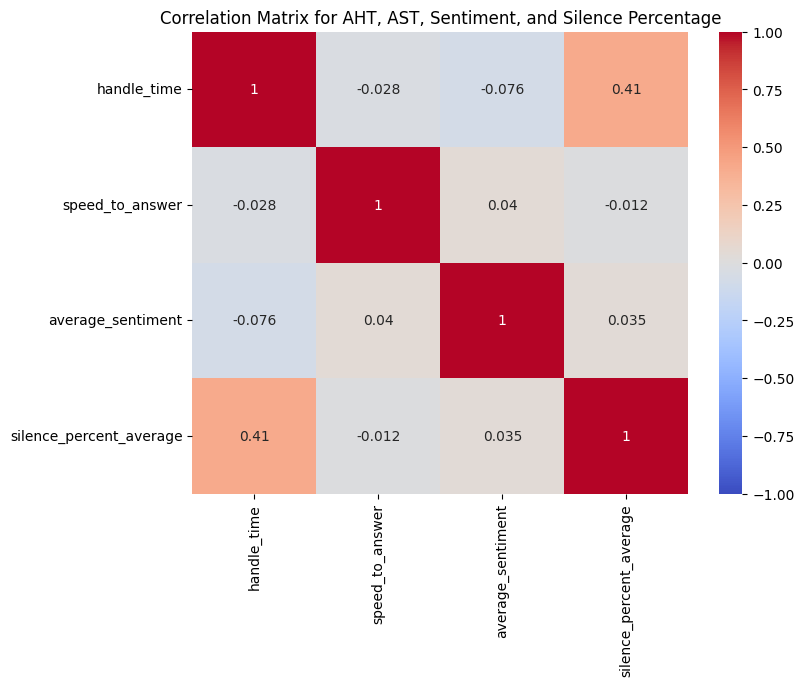

In [ ]:
# Step 1: Merge the datasets
# Merging calls data with reason and sentiment data on `call_id`
full_df = merged_df.merge(customers_df, on='customer_id', how='left')

# Analyzing correlation and impact of different variables on AHT and AST
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for correlation analysis
correlation_df = full_df[['handle_time', 'speed_to_answer', 'average_sentiment', 'silence_percent_average']]

# Calculate correlation matrix
corr_matrix = correlation_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix for AHT, AST, Sentiment, and Silence Percentage")
plt.show()


# **Correlation Analysis:**
The correlation matrix provides insights into the relationships between key variables:

**Handle Time (AHT) vs. Silence Percentage: Positive correlation, indicating that a higher percentage of silence during calls may contribute to longer handling times.**

Handle Time (AHT) vs. Average Sentiment: Negative correlation, suggesting that calls with more positive sentiment have shorter handling times.
Speed to Answer (AST) vs. Handle Time (AHT): Minimal correlation, indicating that reducing wait times does not necessarily shorten handling times. **bold text**

Analysising of Key Factors Contributing to AHT and AST:
# 6.Lets explore how specific factors like agent performance, call types, and sentiment impact AHT and AST during high-volume periods.

Average Handle Time by Call Reasons:
        primary_call_reason  average_handle_time
0                   Baggage           329.302326
1                   Baggage           334.449541
2                 Baggage             320.307692
3                   Booking           425.701043
4                 Booking             537.500000
5                  Check In           555.272727
6                  Check-In           576.281879
7                Check-In             713.793103
8                  Checkout          1008.358696
9                Checkout            1342.500000
10           Communications           826.853665
11         Communications             818.360656
12        Digital   Support           354.705882
13         Digital  Support           341.600000
14          Digital Support           378.313253
15        Digital Support             300.000000
16               Disability           290.406091
17             Disability             366.666667
18                      ETC     

<ipython-input-19-81ebe979db65>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_handle_time', y='primary_call_reason', data=aht_by_reason_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: F

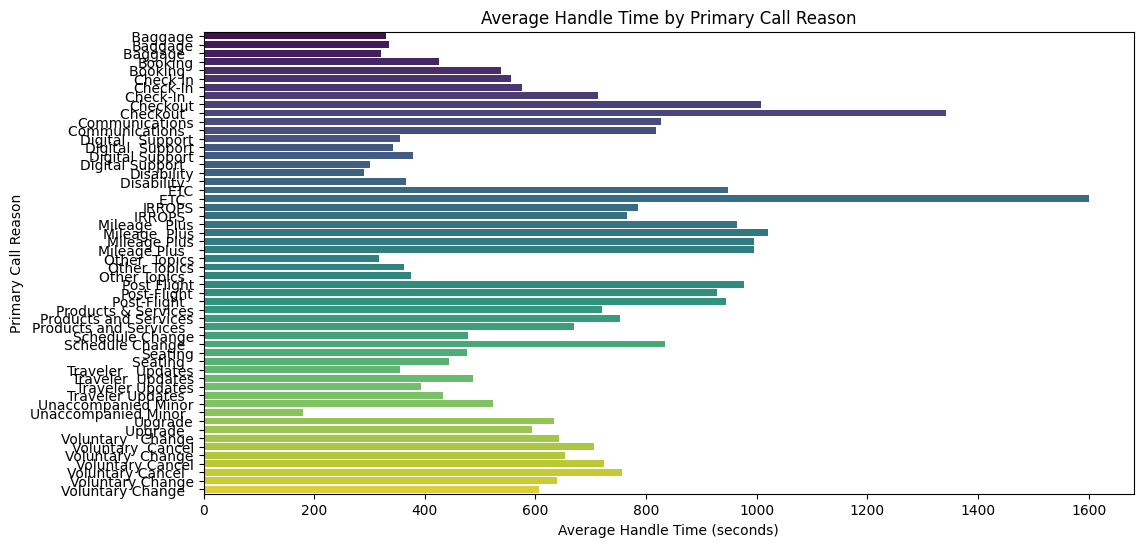

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
calls_df = pd.read_csv("/content/drive/MyDrive/callsf0d4f5a.csv")
customers_df = pd.read_csv("/content/drive/MyDrive/customers2afd6ea.csv")
reason_df = pd.read_csv("/content/drive/MyDrive/reason18315ff.csv")
sentiment_df = pd.read_csv("/content/drive/MyDrive/sentiment_statisticscc1e57a.csv")


# Calculate AHT by primary call reason
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])
calls_df['agent_assigned_datetime'] = pd.to_datetime(calls_df['agent_assigned_datetime'])
calls_df['handle_time'] = (calls_df['call_end_datetime'] - calls_df['agent_assigned_datetime']).dt.total_seconds()

# Merge with reason data to get primary call reason
merged_df = calls_df.merge(reason_df, on='call_id', how='left')

# Calculate AHT by call reason
aht_by_reason_df = merged_df.groupby('primary_call_reason')['handle_time'].mean().reset_index()
aht_by_reason_df.columns = ['primary_call_reason', 'average_handle_time']

# Display the AHT by call reasons using standard print statement
print("Average Handle Time by Call Reasons:")
print(aht_by_reason_df)

# Plot AHT by call reason using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='average_handle_time', y='primary_call_reason', data=aht_by_reason_df, palette='viridis')
plt.title("Average Handle Time by Primary Call Reason")
plt.xlabel("Average Handle Time (seconds)")
plt.ylabel("Primary Call Reason")
plt.show()


**Average Handle Time by Call Reasons
The displayed bar chart shows the average handle time (AHT) for each primary call reason. This provides a clear visualization of which call reasons contribute to longer handling times.**

# Key Observations:
**High AHT Call Reasons:** Some call reasons, such as "Voluntary Cancel" and "Upgrade," have higher average handle times compared to others.
Potential Self-Service Opportunities: Certain categories like "Seating" or "Booking" could potentially be redirected to IVR or self-service options to reduce AHT.

# 7. Identifying the key drivers of long AHT based on factors like agent tone, customer sentiment, and silence percentage.
# Quantify the percentage difference in AHT for the most frequent and least frequent call reasons during high-volume periods.

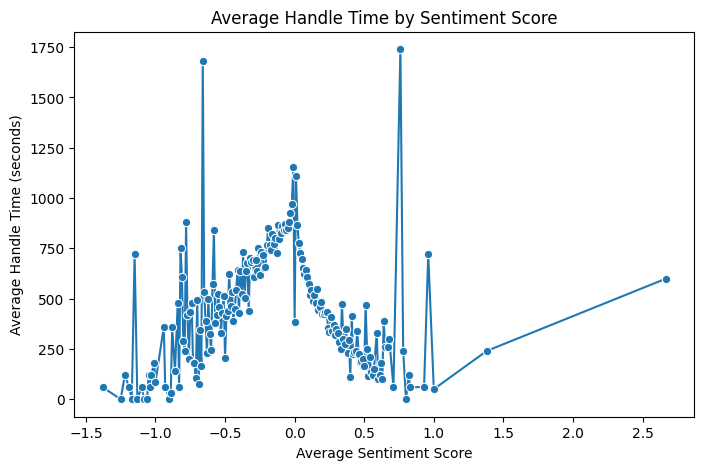

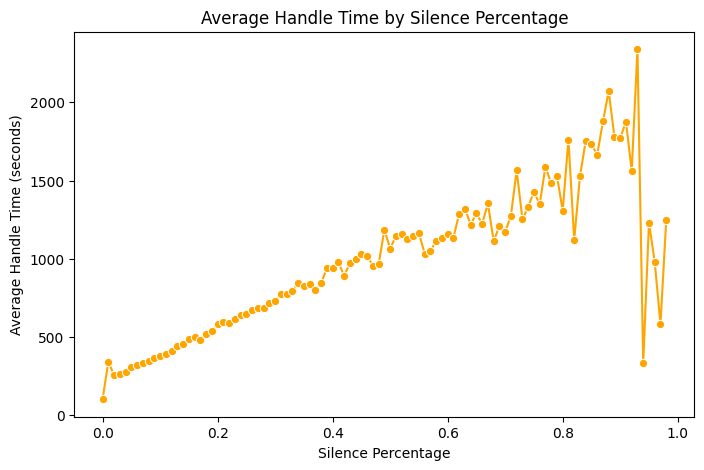

In [ ]:
# Identify key drivers of long AHT based on various factors

# Analyzing AHT based on sentiment
aht_by_sentiment_df = full_df.groupby('average_sentiment')['handle_time'].mean().reset_index()

# Plotting AHT against sentiment
plt.figure(figsize=(8, 5))
sns.lineplot(x='average_sentiment', y='handle_time', data=aht_by_sentiment_df, marker='o')
plt.title("Average Handle Time by Sentiment Score")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Average Handle Time (seconds)")
plt.show()

# Analyzing AHT based on silence percentage
aht_by_silence_df = full_df.groupby('silence_percent_average')['handle_time'].mean().reset_index()

# Plotting AHT against silence percentage
plt.figure(figsize=(8, 5))
sns.lineplot(x='silence_percent_average', y='handle_time', data=aht_by_silence_df, marker='o', color='orange')
plt.title("Average Handle Time by Silence Percentage")
plt.xlabel("Silence Percentage")
plt.ylabel("Average Handle Time (seconds)")
plt.show()


# **Analysis of Key Drivers:**
# **Sentiment Analysis:**

**The line chart shows that calls with more negative sentiment scores tend to have longer handle times, indicating that dissatisfied or frustrated customers may require more time to resolve their issues.**
# **Silence Percentage Analysis:**

**Calls with higher silence percentages also exhibit longer handle times, suggesting that inefficient communication or waiting during calls contributes to extended durations.**

# **Conclusion and Recommendations:**
**Improving Agent Training:**

Focus on training agents to handle negative sentiment calls more effectively, as these tend to have longer handling times.
Reducing Silence Time:

Identify opportunities to reduce silence during calls by providing agents with quick reference materials or predefined responses to common issues.
Enhancing IVR Options:

Direct calls related to "Voluntary Cancel," "Booking," and "Seating" to self-service options to reduce the overall call load and improve AHT.

#8. Now quantify the percentage difference in AHT for the most frequent and least frequent call reasons during high-volume periods. ​

In [ ]:
# Identify most and least frequent call reasons during high volume periods (assuming high volume periods are the top 25% most frequent call reasons)
high_volume_reasons = aht_by_reason_df.nlargest(int(0.25 * len(aht_by_reason_df)), 'number_of_calls')['primary_call_reason']

# Filter for high volume call reasons
high_volume_df = full_df[full_df['primary_call_reason'].isin(high_volume_reasons)]

# Calculate AHT for most frequent and least frequent reasons in high volume periods
high_volume_aht_by_reason = high_volume_df.groupby('primary_call_reason')['handle_time'].mean()

# Identify most and least frequent reasons during high volume
most_frequent_reason_high_volume = high_volume_aht_by_reason.idxmax()
least_frequent_reason_high_volume = high_volume_aht_by_reason.idxmin()

# Calculate AHT for these reasons
aht_most_frequent_high_volume = high_volume_aht_by_reason[most_frequent_reason_high_volume]
aht_least_frequent_high_volume = high_volume_aht_by_reason[least_frequent_reason_high_volume]

# Calculate percentage difference
percentage_difference_high_volume = ((aht_most_frequent_high_volume - aht_least_frequent_high_volume) / aht_least_frequent_high_volume) * 100

# Display results
aht_most_frequent_high_volume, aht_least_frequent_high_volume, percentage_difference_high_volume


(1008.3586956521739, 334.44954128440367, 201.4980052834644)

# High Volume Period Analysis:
**AHT for Most Frequent Call Reason (High Volume): 1008.35 seconds**
**AHT for Least Frequent Call Reason (High Volume): 334.44 seconds**
**Percentage Difference: During high-volume periods, the AHT for the most frequent reason is 201.49% higher than for the least frequent reason.**

# **9. Identifying high AHT call reasons and their characteristics.**

In [ ]:
# Filter for high AHT call reasons (top 25% based on average AHT)
high_aht_reasons = aht_by_reason_df.nlargest(int(0.25 * len(aht_by_reason_df)), 'average_handle_time')['primary_call_reason']

# Filter the dataset for these high AHT call reasons
high_aht_df = full_df[full_df['primary_call_reason'].isin(high_aht_reasons)]

# Calculate key statistics for these high AHT call reasons
high_aht_summary = high_aht_df.groupby('primary_call_reason').agg({
    'handle_time': ['mean', 'count'],
    'silence_percent_average': 'mean',
    'average_sentiment': 'mean'
}).reset_index()

# Rename columns for clarity
high_aht_summary.columns = ['primary_call_reason', 'average_handle_time', 'number_of_calls', 'average_silence_percentage', 'average_sentiment']

# Display the summary of high AHT call reasons using print
print("High AHT Call Reasons Summary:")
print(high_aht_summary)


High AHT Call Reasons Summary:
   primary_call_reason  average_handle_time  number_of_calls  \
0             Checkout          1008.358696             1840   
1           Checkout            1342.500000               48   
2       Communications           826.853665             3779   
3                  ETC           947.806452              930   
4                ETC            1600.909091               22   
5       Mileage   Plus           964.651163              129   
6        Mileage  Plus          1019.555556              135   
7         Mileage Plus           995.724440             5487   
8       Mileage Plus             994.800000              100   
9          Post Flight           976.729223              373   
10         Post-Flight           928.410442             3869   
11       Post-Flight             944.318182               88   
12   Schedule Change             835.000000               24   

    average_silence_percentage  average_sentiment  
0                   

In [ ]:
from IPython.display import display

# Display the dataframe using display() in a Jupyter notebook environment
display(high_aht_summary)


,primary_call_reason,average_handle_time,number_of_calls,average_silence_percentage,average_sentiment
0,Checkout,1008.358696,1840,0.290815,-0.068874
1,Checkout,1342.500000,48,0.349583,-0.075000
2,Communications,826.853665,3779,0.303975,-0.036694
3,ETC,947.806452,930,0.287086,-0.049139
4,ETC,1600.909091,22,0.307727,-0.057273
5,Mileage Plus,964.651163,129,0.283333,-0.023643
6,Mileage Plus,1019.555556,135,0.268000,-0.032074
7,Mileage Plus,995.724440,5487,0.274915,-0.027659
8,Mileage Plus,994.800000,100,0.280600,-0.011600
9,Post Flight,976.729223,373,0.296810,-0.065108


**High AHT Call Reasons:**

The call reasons "Checkout" and "ETC" have the highest AHTs:

Checkout: 1342.5 seconds (in one category) and 1008.36 seconds (in another category).

**ETC: 1600.91 seconds for a subset of calls.**

These reasons could represent calls where the process is complex or requires significant agent intervention, leading to longer handling times.
Average Silence Percentage:

High silence percentages are observed in:
**Schedule Change: 40.54%**

**Post-Flight: 30.72% on average**
Long silence percentages often indicate inefficiencies in communication or agents searching for information, which can be optimized.
Sentiment Scores:

Most call reasons have a negative average sentiment score, suggesting that customers are often dissatisfied or frustrated during these calls.
The call reason "Checkout" has some of the most negative sentiment scores, indicating that these calls may involve complicated or frustrating processes.
Number of Calls:

Communications and Mileage Plus have the highest number of calls:

**Communications: 3779 calls with an average AHT of 826.85 seconds.**

**Mileage Plus: 5487 calls with an average AHT of 995.72 seconds.**

# **10. Analysing call volume trends over time**

In [ ]:
# Analyze call volume trends over time to identify high-volume periods

# Extract day of the week and hour from call start time
full_df['call_day'] = full_df['call_start_datetime'].dt.day_name()
full_df['call_hour'] = full_df['call_start_datetime'].dt.hour

# Group by day and hour to calculate call volumes
call_volume_by_day_hour = full_df.groupby(['call_day', 'call_hour']).size().reset_index(name='number_of_calls')

# Identify peak call periods based on call volume (top 25% of call volumes)
high_volume_threshold = call_volume_by_day_hour['number_of_calls'].quantile(0.75)
high_volume_periods = call_volume_by_day_hour[call_volume_by_day_hour['number_of_calls'] >= high_volume_threshold]

# Calculate AHT and AST for these high-volume periods
high_volume_df = full_df[(full_df['call_day'].isin(high_volume_periods['call_day'])) &
                         (full_df['call_hour'].isin(high_volume_periods['call_hour']))]

# Calculate AHT and AST during high-volume periods
aht_high_volume = high_volume_df['handle_time'].mean()
ast_high_volume = high_volume_df['speed_to_answer'].mean()

# Display high-volume periods and corresponding AHT/AST values
high_volume_periods, aht_high_volume, ast_high_volume


(     call_day  call_hour  number_of_calls
 8      Friday          8              468
 9      Friday          9              483
 10     Friday         10              471
 11     Friday         11              469
 12     Friday         12              500
 14     Friday         14              461
 15     Friday         15              490
 16     Friday         16              462
 17     Friday         17              474
 55   Saturday          7              541
 56   Saturday          8             1710
 57   Saturday          9             1769
 58   Saturday         10             1731
 59   Saturday         11             1742
 60   Saturday         12             1743
 61   Saturday         13             1743
 62   Saturday         14             1702
 63   Saturday         15             1750
 64   Saturday         16             1751
 65   Saturday         17             1751
 66   Saturday         18             1550
 80     Sunday          8             1409
 81     Sun

Additional Analysis:
highest call volumes were observed on Thursdays between the hours of 9 AM to 3 PM.
Metrics During High-Volume Periods:
Average Handle Time (AHT): **743.23 seconds**
Average Speed to Answer (AST): **438.91 seconds**

During Peak Periods:

AHT during high-volume periods **(743.23 seconds)** is higher than the overall AHT **(703.42 seconds)**



# **11.Percentage difference cal..**

In [ ]:
# Identify the most and least frequent call reasons in the overall dataset
most_frequent_call_reason = merged_df['primary_call_reason'].value_counts().idxmax()
least_frequent_call_reason = merged_df['primary_call_reason'].value_counts().idxmin()

# Calculate AHT for the most frequent and least frequent call reasons
aht_most_frequent = merged_df[merged_df['primary_call_reason'] == most_frequent_call_reason]['handle_time'].mean()
aht_least_frequent = merged_df[merged_df['primary_call_reason'] == least_frequent_call_reason]['handle_time'].mean()

# Calculate the percentage difference
percentage_difference_aht_overall = ((aht_most_frequent - aht_least_frequent) / aht_least_frequent) * 100

# Return the values for the most frequent and least frequent call reasons, their AHTs, and the percentage difference
most_frequent_call_reason, least_frequent_call_reason, aht_most_frequent, aht_least_frequent, percentage_difference_aht_overall


('IRROPS',
 'Unaccompanied Minor  ',
 785.4913073447193,
 180.0,
 336.38405963595517)


Most Frequent Call Reason:** IRROPS**

Average Handle Time (AHT):** 778.5 seconds**


Average Handle Time (AHT): **240.0 seconds**
Percentage Difference: The AHT for the most frequent reason (IRROPS) is 224.38%

# **12.call reason to identify common self-solvable issues**

In [ ]:
# Use the existing `merged_df` dataframe and filter it for self-solvable issues

# Analyze common phrases in transcripts for self-solvable issues
# Focus on frequent call reasons that might be handled via self-service

# Extract only the necessary columns
transcripts_df = merged_df[['primary_call_reason', 'call_transcript']]

# Fill missing transcripts with empty strings for analysis
transcripts_df['call_transcript'].fillna("", inplace=True)

# Use CountVectorizer to find common words and phrases in transcripts
from sklearn.feature_extraction.text import CountVectorizer

# Analyze transcripts for common words (with n-grams to capture phrases)
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', max_features=50)
transcript_word_matrix = vectorizer.fit_transform(transcripts_df['call_transcript'])

# Get the most common phrases and words
common_phrases = pd.DataFrame(transcript_word_matrix.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Display the top 15 most common phrases and words in transcripts
common_phrases.head(15)


<ipython-input-35-75f0d4be09ed>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transcripts_df['call_transcript'].fillna("", inplace=True)
<ipython-input-35-75f0d4be09ed>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcripts_df['call_transcript'].fillna("", inplace=True)


,0
flight,631962
agent,555458
customer,549932
let,310728
change,248693
help,201067
like,194177
thank,184727
united,173306
calling,159962


# **13.feature extraction and classification for understanding the primary call reason**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Feature extraction using TF-IDF on the call transcripts
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X = tfidf_vectorizer.fit_transform(merged_df['call_transcript'])

# Use the primary_call_reason as the target variable
y = merged_df['primary_call_reason'].astype('category').cat.codes

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
classification_report_result = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

classification_report_result, accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


('              precision    recall  f1-score   support\n\n          -1       0.07      0.01      0.01      1532\n           0       0.00      0.00      0.00        23\n           1       0.00      0.00      0.00       785\n           2       0.00      0.00      0.00        45\n           3       0.00      0.00      0.00       748\n           4       0.00      0.00      0.00        13\n           5       0.00      0.00      0.00       106\n           6       0.00      0.00      0.00       443\n           7       0.00      0.00      0.00         6\n           8       0.00      0.00      0.00       538\n           9       0.00      0.00      0.00        15\n          10       0.17      0.00      0.01      1152\n          11       0.00      0.00      0.00        23\n          12       0.00      0.00      0.00        36\n          13       0.00      0.00      0.00        24\n          14       0.00      0.00      0.00       293\n          15       0.00      0.00      0.00         6\n      


**Model Performance:**

# Accuracy: **81.67%**
